In [1]:
%matplotlib inline
import pdb
import sys
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal as sg
import math
import scipy as sp
import socket
import os

matplotlib.style.use('ggplot')

comp_name=socket.gethostname()
if  comp_name == 'Ezequiels-MacBook-Pro.local':
    print 'Computer: ' + comp_name
    sys.path.append('/Users/zeke/experiment/ephysDataManagement/ephysScripts')
    experiment_folder = os.path.join('/Users','zeke','experiment')
else:
    print 'Computer: ' + 'server'
    sys.path.append('/experiment/ephysDataManagement/ephysScripts')
    experiment_folder = os.path.join('/','experiment')
    
import unitToolsv2
from data_handling import ephys_names as en
from data_handling.basic_plot import decim, plot_raster, make_psth
from data_handling import data_load as dl
from analysis import stimulus as st

#load all the records, to not load all the records for every stimulus
fn = en.file_names()
cells_path = fn.fold_exp_data
all_records = dl.load_cells(cells_path)

Computer: server
Computer: server
['ZKawakeM72_013_f_010', 'ZKawakeM72_013_e_010']
['/experiment/export_data/ZKawakeM72_013_f_trial.mat', '/experiment/export_data/ZKawakeM72_013_e_trial.mat']
/experiment/export_data/ZKawakeM72_013_f_trial.mat
/experiment/export_data/ZKawakeM72_013_e_trial.mat
['/experiment/export_data/ZKawakeM72_013_f_noStimSniff.mat', '/experiment/export_data/ZKawakeM72_013_e_noStimSniff.mat']
/experiment/export_data/ZKawakeM72_013_f_noStimSniff.mat
/experiment/export_data/ZKawakeM72_013_e_noStimSniff.mat
['ZKawakeM72_013_e_011']
[]
[]


In [12]:
all_records['base_sniff']['ZKawakeM72_013_f'][5]['flow']

array([ -8.96880797e+02,  -8.96416708e+02,  -8.96437782e+02,
        -8.96966239e+02,  -8.98034738e+02,  -8.99684749e+02,
        -9.01962223e+02,  -9.04914037e+02,  -9.08588243e+02,
        -9.13035748e+02,  -9.18310153e+02,  -9.24466444e+02,
        -9.31560129e+02,  -9.39644841e+02,  -9.48766145e+02,
        -9.58953943e+02,  -9.70217949e+02,  -9.82547480e+02,
        -9.95912156e+02,  -1.01026120e+03,  -1.02552332e+03,
        -1.04160809e+03,  -1.05840837e+03,  -1.07580366e+03,
        -1.09366383e+03,  -1.11185429e+03,  -1.13024416e+03,
        -1.14871594e+03,  -1.16717312e+03,  -1.18554373e+03,
        -1.20378109e+03,  -1.22186492e+03,  -1.23980290e+03,
        -1.25762895e+03,  -1.27539663e+03,  -1.29317125e+03,
        -1.31102575e+03,  -1.32904167e+03,  -1.34731047e+03,
        -1.36593227e+03,  -1.38501487e+03,  -1.40467626e+03,
        -1.42504847e+03,  -1.44627989e+03,  -1.46853638e+03,
        -1.49200206e+03,  -1.51687984e+03,  -1.54339168e+03,
        -1.57177844e+03,

In [16]:
all_records['responses'].keys()

['ZKawakeM72_013_f_010', 'ZKawakeM72_013_e_011', 'ZKawakeM72_013_e_010']

In [13]:
#load all the records, to not load all the records for every stimulus
fn = en.file_names()
cells_path = fn.fold_exp_data
all_records = dl.load_cells(cells_path)


['ZKawakeM72_013_f_010', 'ZKawakeM72_013_e_010']
['/experiment/export_data/ZKawakeM72_013_f_trial.mat', '/experiment/export_data/ZKawakeM72_013_e_trial.mat']
/experiment/export_data/ZKawakeM72_013_f_trial.mat
/experiment/export_data/ZKawakeM72_013_e_trial.mat
['/experiment/export_data/ZKawakeM72_013_f_noStimSniff.mat', '/experiment/export_data/ZKawakeM72_013_e_noStimSniff.mat']
/experiment/export_data/ZKawakeM72_013_f_noStimSniff.mat
/experiment/export_data/ZKawakeM72_013_e_noStimSniff.mat
['ZKawakeM72_013_e_011']
[]
[]


In [9]:
## create a stimulus and initialize it (load its responses)
high_2hydroxy = st.Odor(['2-hydroxyacetophenone','2hydroxyacetophenone'], 0.0051)
st_1 = st.Stimulus(high_2hydroxy, records = all_records, tags = {'light':1} )

[{'ax_stack': <matplotlib.figure.AxesStack at 0x7f85f1011d90>,
  'fig': None,
  'figure': <matplotlib.figure.Figure at 0x7f85ebb47d50>}]

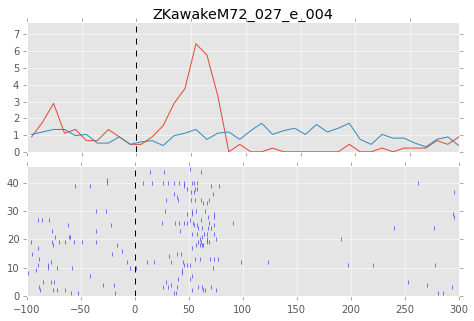

In [10]:
#get the first response and plot it
[r.plot() for r in list(st_1.responses.values())]

In [9]:
for property, value in vars(r).iteritems():
    print property, ": "

raster : 
baseline : 
raster_plot : 
base_sniff : 
all_trials : 
rec : 


In [6]:
r.base_sniff.data.keys()

['phase', 'start', 'trial_uid', 'flow', 'rec_id']

In [11]:
14150-13579

571

In [73]:
#Load a sniff file into a rec array
def load_sniffs(mat_file_path, as_dict = True):
    print mat_file_path
    assert(os.path.isfile(mat_file_path))
    struct_name = os.path.split(mat_file_path)[-1].split('.')[0].split('_')[-1]
    sniff_data = sio.loadmat(mat_file_path, struct_as_record=False, squeeze_me=True)

    if type(sniff_data[struct_name]) == np.ndarray:
        #if there are many sniffs
        num_sniffs = sniff_data[struct_name].shape[0]
        sniffs = np.zeros((num_sniffs,), dtype=np.dtype([('flow', np.ndarray),
                                                           ('t_0', np.int),
                                                           ('t_zer', np.ndarray),
                                                           ('t_zer_fit',np.ndarray)]))
        i_sniff = 0
        for sniff_struct in  sniff_data[struct_name]:
            sniffs[i_sniff]['flow'] = np.array(sniff_struct.waveform, dtype=np.float)
            sniffs[i_sniff]['t_0'] = sniff_struct.t0
            sniffs[i_sniff]['t_zer'] = np.array(sniff_struct.t_zer, dtype=np.int)
            sniffs[i_sniff]['t_zer_fit'] = np.array(sniff_struct.t_zer_fit, dtype=np.float)
            i_sniff+=1

    else:
        sniff = None

    if as_dict:
        return sniffs
    else:
        sniffs_list = [sniffs[a_key] for a_key in sniffs.keys()]
        return sniffs_list

In [74]:
sniff_file = '/experiment/export_data/ZKawakeM72_013_e_noStimSniff.mat'
sniffs = load_sniffs(sniff_file)

/experiment/export_data/ZKawakeM72_013_e_noStimSniff.mat


In [6]:
mat_file_path = sniff_file
struct_name = os.path.split(mat_file_path)[-1].split('.')[0].split('_')[-1]
sniff_data = sio.loadmat(mat_file_path, struct_as_record=False, squeeze_me=True)

array([array([ 221.48027953,  321.57838197,  696.33119187,  796.08200932]),
       array([ 240.32890276,  330.08340451,  652.84708472,  751.81833642]),
       array([ 246.8579847 ,  340.1066218 ,  722.45718901,  824.16732064]),
       ...,
       array([ 150.35277183,  219.59127036,  516.83340847,  623.39370637]),
       array([ 208.69622271,  306.17580239,  578.88618434,  677.54341882]),
       array([ 208.96599398,  303.28660797,  575.01485834,  696.67504373])], dtype=object)

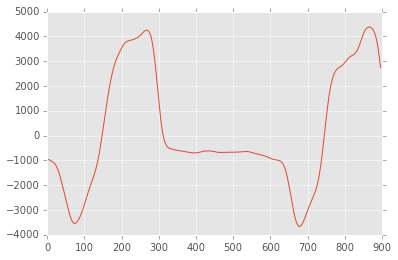

In [77]:
plt.plot(sniffs[10]['flow'])
sniffs[10]['t_zer_fit']
sniffs['t_zer_fit']

In [9]:
sniff_data.keys()

['noStimSniffs', '__version__', '__header__', '__globals__']

In [20]:
sniffs = np.ndarray((10,), dtype=np.dtype([('flow', np.ndarray), ('t_zer_fit',np.zeros([1,1]))] ))

TypeError: data type not understood

In [31]:
arec = np.zeros((2,), dtype = np.dtype([('flow', np.ndarray), ('t_0',np.int)]))

In [43]:
arec[1]['flow']=np.array(50)

In [47]:
a=""
[a+=str(x) for x in 'ZKawakeM72_013_f_noStimSniff.mat'.split('_')[0:3]]

SyntaxError: invalid syntax (<ipython-input-47-fda27593df77>, line 2)

In [33]:
'ZKawakeM72_013_f_noStimSniff.mat'.split('_')[0:3]

['ZKawakeM72', '013', 'f']

In [48]:
sent_str = ""
for i in 'ZKawakeM72_013_f_noStimSniff.mat'.split('_')[0:3]:
    sent_str += str(i) + "_"
sent_str = sent_str[:-1]
print sent_str

ZKawakeM72_013_f
